In [ ]:
import pandas as pd

# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
olist_dataset = pd.read_csv('/content/drive/MyDrive/TugasBesar-Kelas01-KelompokG/Olist_Financial_and_Customer.csv', on_bad_lines='skip')
olist_dataset.head()

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_value,product_id,product_category_name,order_item_id,price,seller_id,seller_city,order_processing_time,delay_day,delay_state
0,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 8:59:02,2017-09-20 23:43:48,2017-09-29 0:00:00,72.2,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,1,58.9,48436dade18ac8b2bce089ec2a041202,volta redonda,6.0,7.0,On Time
1,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 0:00:00,259.8,e5f2d52b802189ee658865ca93d83a8f,pet_shop,1,239.9,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,13.0,1.0,On Time
2,6489ae5e4333f3693df5ad4372dab6d3,para de minas,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 0:00:00,216.9,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,1,199.0,5b51032eddd242adc84c38acab88f23d,borda da mata,5.0,10.0,On Time
3,d4eb9395c8c0431ee92fce09860c5a06,atibaia,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 0:00:00,25.8,7634da152a4610f1595efa32f14722fc,perfumaria,1,13.0,9d7a1d34a5052409006425275ba1c2b4,franca,5.0,4.0,On Time
4,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 0:00:00,218.0,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,1,199.9,df560393f3a51e74553ab94004ba5c87,loanda,18.0,12.0,On Time


In [ ]:
olist = olist_dataset.copy()

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117601 non-null  object 
 1   customer_city                  117601 non-null  object 
 2   order_id                       117601 non-null  object 
 3   order_status                   117601 non-null  object 
 4   order_purchase_timestamp       117601 non-null  object 
 5   order_delivered_customer_date  115034 non-null  object 
 6   order_estimated_delivery_date  117601 non-null  object 
 7   payment_value                  117601 non-null  float64
 8   product_id                     117601 non-null  object 
 9   product_category_name          115903 non-null  object 
 10  order_item_id                  117601 non-null  int64  
 11  price                          117601 non-null  float64
 12  seller_id                     

#  Preprocessing

In [ ]:
olist.duplicated().sum()

774

In [ ]:
olist = olist.drop_duplicates()
olist.duplicated().sum()

0

In [ ]:
olist.isna().sum()

customer_id                         0
customer_city                       0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2567
order_estimated_delivery_date       0
payment_value                       0
product_id                          0
product_category_name            1698
order_item_id                       0
price                               0
seller_id                           0
seller_city                         0
order_processing_time            2567
delay_day                        2567
delay_state                         0
dtype: int64

In [ ]:
olist.dropna(inplace=True, axis=0)
olist.isna().sum()

customer_id                      0
customer_city                    0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_value                    0
product_id                       0
product_category_name            0
order_item_id                    0
price                            0
seller_id                        0
seller_city                      0
order_processing_time            0
delay_day                        0
delay_state                      0
dtype: int64

In [ ]:
olist.dtypes

customer_id                       object
customer_city                     object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_value                    float64
product_id                        object
product_category_name             object
order_item_id                      int64
price                            float64
seller_id                         object
seller_city                       object
order_processing_time            float64
delay_day                        float64
delay_state                       object
dtype: object

In [ ]:
olist['order_purchase_timestamp'] = pd.to_datetime(olist['order_purchase_timestamp'])
olist['order_delivered_customer_date'] = pd.to_datetime(olist['order_delivered_customer_date'])
olist['order_estimated_delivery_date'] = pd.to_datetime(olist['order_estimated_delivery_date'])

In [ ]:
olist.dtypes

customer_id                              object
customer_city                            object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_value                           float64
product_id                               object
product_category_name                    object
order_item_id                             int64
price                                   float64
seller_id                                object
seller_city                              object
order_processing_time                   float64
delay_day                               float64
delay_state                              object
dtype: object

In [ ]:
olist.describe(include=['float64', 'int64']).T

,count,mean,std,min,25%,50%,75%,max
payment_value,113406.0,172.254550,266.632645,0.0,61.0,108.15,189.4,13664.1
order_item_id,113406.0,1.196824,0.701229,1.0,1.0,1.00,1.0,21.0
price,113406.0,120.202333,182.831238,0.8,39.9,74.90,133.9,6735.0
order_processing_time,113406.0,9.381946,6.739257,1.0,5.0,8.00,12.0,150.0
delay_day,113406.0,8.507381,7.402383,-135.0,5.0,9.00,12.0,105.0


In [ ]:
olist.describe(include=['object'])

,customer_id,customer_city,order_id,order_status,product_id,product_category_name,seller_id,seller_city,delay_state
count,113406,113406,113406,113406,113406,113406,113406,113406,113406
unique,95143,4073,95143,2,31630,73,2914,588,2
top,270c23a11d024a44c896d1894b261a83,sao paulo,895ab968e7bb0d5659d16cd74cd1650c,delivered,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,4a3ca9315b744ce9f8e9374361493884,sao paulo,On Time
freq,63,17869,63,113399,529,11650,2094,28302,104529


In [ ]:
olist.describe(include=['datetime64[ns]'])

<ipython-input-13-bec6edc5c428>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  olist.describe(include=['datetime64[ns]'])


,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
count,113406,113406,113406
unique,94639,94355,444
top,2017-08-08 20:26:31,2017-08-14 12:46:18,2017-12-20 00:00:00
freq,63,63,637
first,2016-10-03 09:44:50,2016-10-11 13:46:32,2016-10-27 00:00:00
last,2018-08-29 15:00:37,2018-10-17 13:22:46,2018-10-25 00:00:00


In [ ]:
olist.dtypes

customer_id                              object
customer_city                            object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_value                           float64
product_id                               object
product_category_name                    object
order_item_id                             int64
price                                   float64
seller_id                                object
seller_city                              object
order_processing_time                   float64
delay_day                               float64
delay_state                              object
dtype: object

In [ ]:
olist.nunique()

customer_id                      95143
customer_city                     4073
order_id                         95143
order_status                         2
order_purchase_timestamp         94639
order_delivered_customer_date    94355
order_estimated_delivery_date      444
payment_value                     7496
product_id                       31630
product_category_name               73
order_item_id                       21
price                             3205
seller_id                         2914
seller_city                        588
order_processing_time              112
delay_day                          155
delay_state                          2
dtype: int64

In [ ]:
olist.isna().sum()

customer_id                      0
customer_city                    0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_value                    0
product_id                       0
product_category_name            0
order_item_id                    0
price                            0
seller_id                        0
seller_city                      0
order_processing_time            0
delay_day                        0
delay_state                      0
dtype: int64

## LabelEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

one_hot_encod = OneHotEncoder()
ordinal_encod = OrdinalEncoder()
label_encod = LabelEncoder()

In [ ]:
olist.select_dtypes(include='object')

,customer_id,customer_city,order_id,order_status,product_id,product_category_name,seller_id,seller_city,delay_state
0,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,00010242fe8c5a6d1ba2dd792cb16214,delivered,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,48436dade18ac8b2bce089ec2a041202,volta redonda,On Time
1,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,00018f77f2f0320c557190d7a144bdd3,delivered,e5f2d52b802189ee658865ca93d83a8f,pet_shop,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,On Time
2,6489ae5e4333f3693df5ad4372dab6d3,para de minas,000229ec398224ef6ca0657da4fc703e,delivered,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,5b51032eddd242adc84c38acab88f23d,borda da mata,On Time
3,d4eb9395c8c0431ee92fce09860c5a06,atibaia,00024acbcdf0a6daa1e931b038114c75,delivered,7634da152a4610f1595efa32f14722fc,perfumaria,9d7a1d34a5052409006425275ba1c2b4,franca,On Time
4,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,df560393f3a51e74553ab94004ba5c87,loanda,On Time
...,...,...,...,...,...,...,...,...,...
117596,b51593916b4b8e0d6f66f2ae24f2673d,sao luis,fffc94f6ce00a00581880bf54a75a037,delivered,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,b8bc237ba3788b23da09c0f1f3a3288c,itajai,On Time
117597,84c5d4fbaf120aae381fad077416eaa0,curitiba,fffcd46ef2263f404302a634eb57f7eb,delivered,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,f3c38ab652836d21de61fb8314b69182,sao paulo,On Time
117598,29309aa813182aaddc9b259e31b870e6,sao paulo,fffce4705a9662cd70adb13d4a31832d,delivered,72a30483855e2eafc67aee5dc2560482,esporte_lazer,c3cfdc648177fdbbbb35635a37472c53,curitiba,On Time
117599,b5e6afd5a41800fdf401e0272ca74655,vinhedo,fffe18544ffabc95dfada21779c9644f,delivered,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,2b3e4a2a3ea8e01938cabda2a3e5cc79,sao paulo,On Time


In [ ]:
categoric_data = ['customer_id' ,'customer_city', 'order_id', 'order_status', 'product_id', 'product_category_name', 'seller_id', 'seller_city', 'delay_state']
numeric_data = ['payment_value', 'order_item_id', 'price']

In [ ]:
len(numeric_data)

3

In [ ]:
# categoric_data = ordinal_encod.fit_transform(categoric_data)
# categoric_data

In [ ]:
# categoric_data = pd.DataFrame(categoric_data, columns=['customer_city', 'product_id', 'product_category_name', 'seller_id', 'seller_city'])
# categoric_data.head(1)

In [ ]:
len(categoric_data)

9

In [ ]:
for i in categoric_data:
    olist[i] = label_encod.fit_transform(olist[i])

olist.dtypes

customer_id                               int64
customer_city                             int64
order_id                                  int64
order_status                              int64
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_value                           float64
product_id                                int64
product_category_name                     int64
order_item_id                             int64
price                                   float64
seller_id                                 int64
seller_city                               int64
order_processing_time                   float64
delay_day                               float64
delay_state                               int64
dtype: object

In [ ]:
olist.head(1)

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_value,product_id,product_category_name,order_item_id,price,seller_id,seller_city,order_processing_time,delay_day,delay_state
0,22715,731,0,1,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,72.2,8293,26,1,58.9,818,583,6.0,7.0,1


## Capping & Inter-Quartile Range (IQR)

### price

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = olist["price"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = olist["price"], palette="Dark2")
# plt.show()

In [ ]:
# import numpy as np

In [ ]:
# #finding the Q1(25 percentile) and Q3(75 percentile)
# q1 = olist["price"].quantile(0.25)
# q2 = olist["price"].quantile(0.75)

In [ ]:
# #finding out the value of Inter Quartile Range
# IQR = q2 - q1

In [ ]:
# #defining max and min limits
# max_limit = q2 + (1.5 * IQR)
# min_limit = q1 - (1.5 * IQR)

In [ ]:
# #capping
# nooutlier_olist = pd.DataFrame(np.where(olist["price"] > max_limit, max_limit,
#          (np.where(olist["price"] < min_limit, min_limit, olist["price"]))), columns=["price"])

In [ ]:
# olist['price'] = nooutlier_olist["price"]

In [ ]:
# olist.head()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = olist["price"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = olist["price"], palette="Dark2")
# plt.show()

### payment_value

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = olist["payment_value"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = olist["payment_value"], palette="Dark2")
# plt.show()

In [ ]:
# import numpy as np

In [ ]:
# #finding the Q1(25 percentile) and Q3(75 percentile)
# q1 = olist["payment_value"].quantile(0.25)
# q2 = olist["payment_value"].quantile(0.75)

In [ ]:
# #finding out the value of Inter Quartile Range
# IQR = q2 - q1

In [ ]:
# #defining max and min limits
# max_limit = q2 + (1.5 * IQR)
# min_limit = q1 - (1.5 * IQR)

In [ ]:
# #capping
# nooutlier_olist = pd.DataFrame(np.where(olist["payment_value"] > max_limit, max_limit,
#          (np.where(olist["payment_value"] < min_limit, min_limit, olist["payment_value"]))), columns=["payment_value"])

In [ ]:
# olist['payment_value'] = nooutlier_olist["payment_value"]

In [ ]:
# olist.head()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = olist["payment_value"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = olist["payment_value"], palette="Dark2")
# plt.show()

### order_processing_time

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = olist["order_processing_time"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = olist["order_processing_time"], palette="Dark2")
# plt.show()

In [ ]:
# import numpy as np

In [ ]:
# #finding the Q1(25 percentile) and Q3(75 percentile)
# q1 = olist["order_processing_time"].quantile(0.25)
# q2 = olist["order_processing_time"].quantile(0.75)

In [ ]:
# #finding out the value of Inter Quartile Range
# IQR = q2 - q1

In [ ]:
# #defining max and min limits
# max_limit = q2 + (1.5 * IQR)
# min_limit = q1 - (1.5 * IQR)

In [ ]:
# #capping
# nooutlier_olist = pd.DataFrame(np.where(olist["order_processing_time"] > max_limit, max_limit,
#          (np.where(olist["order_processing_time"] < min_limit, min_limit, olist["order_processing_time"]))), columns=["order_processing_time"])

In [ ]:
# olist['order_processing_time'] = nooutlier_olist["order_processing_time"]

In [ ]:
# olist.head()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = olist["order_processing_time"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = olist["order_processing_time"], palette="Dark2")
# plt.show()

### delay_day

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = olist["delay_day"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = olist["delay_day"], palette="Dark2")
# plt.show()

In [ ]:
# import numpy as np

In [ ]:
# #finding the Q1(25 percentile) and Q3(75 percentile)
# q1 = olist["delay_day"].quantile(0.25)
# q2 = olist["delay_day"].quantile(0.75)

In [ ]:
# #finding out the value of Inter Quartile Range
# IQR = q2 - q1

In [ ]:
# #defining max and min limits
# max_limit = q2 + (1.5 * IQR)
# min_limit = q1 - (1.5 * IQR)

In [ ]:
# #capping
# nooutlier_olist = pd.DataFrame(np.where(olist["delay_day"] > max_limit, max_limit,
#          (np.where(olist["delay_day"] < min_limit, min_limit, olist["delay_day"]))), columns=["delay_day"])

In [ ]:
# olist['delay_day'] = nooutlier_olist["delay_day"]

In [ ]:
# olist.head()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = olist["payment_value"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = olist["payment_value"], palette="Dark2")
# plt.show()

In [ ]:
# olist.isna().sum()

In [ ]:
# olist.dropna(inplace=True, axis=0)

In [ ]:
olist.isna().sum().sum()

0

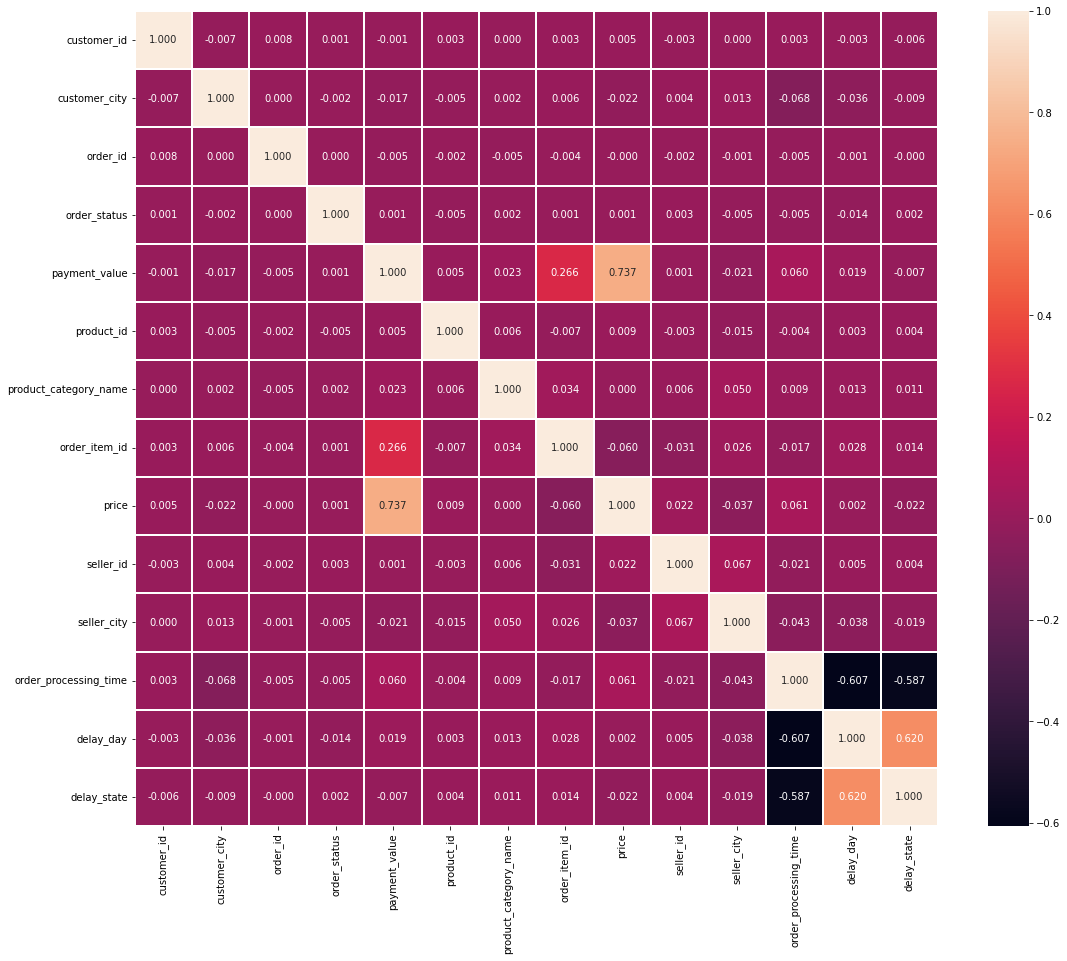

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,15))

sns.heatmap(
    olist.corr(),
    annot=True,
    linecolor='white',
    linewidths=1,
    fmt='.3f'
)

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## delay_day & order_processing_time

In [ ]:
# categoric_column = ['customer_city', 'product_id', 'product_category_name', 'seller_id', 'seller_city']
numeric_column = ['delay_day', 'order_processing_time']
olist_clust = olist[numeric_column]

In [ ]:
olist_clust.columns

Index(['delay_day', 'order_processing_time'], dtype='object')

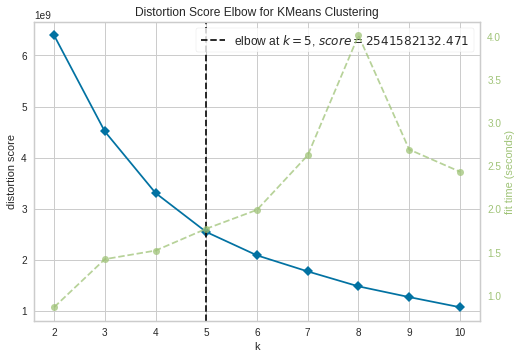

In [ ]:
from pandas.core.common import random_state

Elbow_M = KElbowVisualizer(KMeans(), k=10, random_state=42)
Elbow_M.fit(olist_clust)
Elbow_M.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(olist_clust)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# olist_clust['clusters'] = kmeans.labels_
olist['time_clusters'] = kmeans.labels_

In [ ]:
def persen(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%\n'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


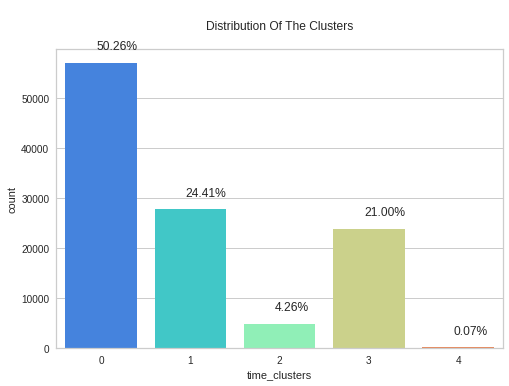

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cp = sns.countplot(olist['time_clusters'], palette='rainbow')
cp.set_title("\nDistribution Of The Clusters\n")

persen(cp, olist['time_clusters'])

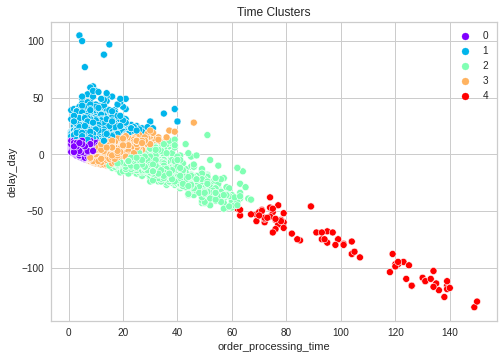

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pl = sns.scatterplot(x=olist['order_processing_time'],
                     y=olist['delay_day'],
                     hue=olist["time_clusters"],
                     palette='rainbow')

pl.set_title("Time Clusters")
plt.legend()
plt.show()

## price & payment_value

In [ ]:
# categoric_column = ['customer_city', 'product_id', 'product_category_name', 'seller_id', 'seller_city']
numeric_column = ['price', 'payment_value']
olist_clust = olist[numeric_column]

In [ ]:
olist_clust.columns

Index(['price', 'payment_value'], dtype='object')

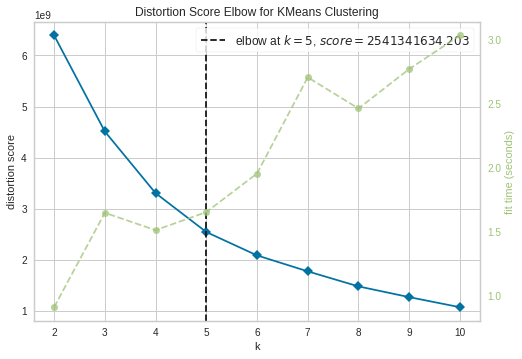

In [ ]:
from pandas.core.common import random_state

Elbow_M = KElbowVisualizer(KMeans(), k=10, random_state=42)
Elbow_M.fit(olist_clust)
Elbow_M.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(olist_clust)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# olist_clust['clusters'] = kmeans.labels_
olist['price_clusters'] = kmeans.labels_

In [ ]:
def persen(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%\n'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


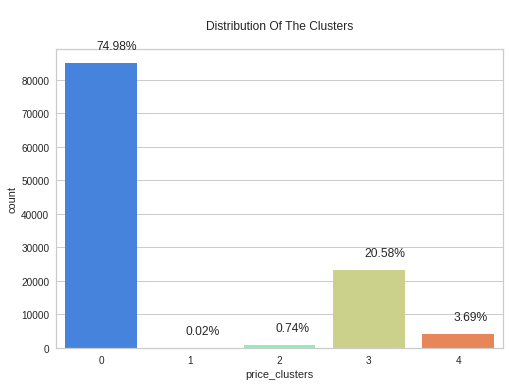

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cp = sns.countplot(olist['price_clusters'], palette='rainbow')
cp.set_title("\nDistribution Of The Clusters\n")

persen(cp, olist['price_clusters'])

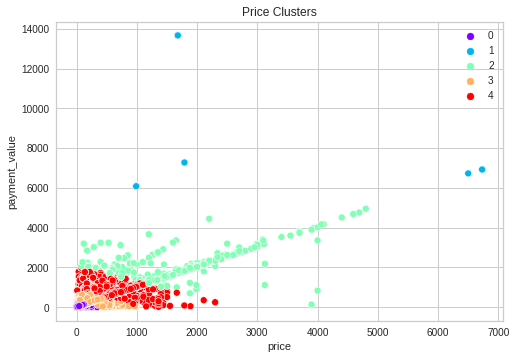

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pl = sns.scatterplot(x=olist['price'],
                     y=olist['payment_value'],
                     hue=olist["price_clusters"],
                     palette='rainbow')

pl.set_title("Price Clusters")
plt.legend()
plt.show()